In [1]:
import sys
sys.path.append('/home/waves8/Thy/Wikipedia-Knowledge-Graph')
import os
os.chdir("/home/waves8/Thy/Wikipedia-Knowledge-Graph")
from src.utils.wiki_article_regressor import *
from src.utils.helpper_function import *
# pd.set_option('display.max_colwidth', 1000)

In [2]:
# !pip install textstat

In [3]:
sent_to_id  ={"fa":0, "c":1,"start":2,"stub":3,"b":4, "ga":5}

In [4]:
df = pd.read_csv('data_train_test/data_train_val.csv',index_col = 0)

### Transformer

In [5]:
# def tokenize_text(text):
#     tokens = []
#     for sent in nltk.sent_tokenize(str(text)):
#         if len(sent) < 2:
#             continue
#         for word in nltk.word_tokenize(sent):
#             if word not in stop_words: 
#                 tokens.append(word.lower())
#     return tokens

In [6]:
# from gensim.sklearn_api import D2VTransformer
# model = D2VTransformer(size=1000, min_count=5, seed=1)
# wordvecs = joblib.load("model/d2v.pkl")
# w2varray = []
# for i in range(len(df)):
#     tokeniner = tokenize_text(df.iloc[i]['clean_content'])
#     transformob = wordvecs.transform(tokeniner)
#     if w2varray == []:
#         w2varray.append(transformob)
#         w2varray = w2varray[0]
#     else:
#         w2varray = np.concatenate((w2varray,transformob))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['article_length','readability_index', 'linsear_write_formula', 'gunning_fog_index','smog_index','syllable_count', 'lexicon_count', 'sentence_count','num_difficult_words', 'dale_chall_readability_score']
num_transformed = scaler.fit_transform(df[num_features])

/home/waves8/anaconda3/envs/thy_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/waves8/anaconda3/envs/thy_env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
# joblib.dump(num_transformed, "model/num_transform.pkl")

In [9]:
df[['label','label_id']].drop_duplicates()

label  label_id
0      fa         0
10     ga         5
7    stub         3
5   start         2
2       c         1
8       b         4

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['label'])
label_encoded_y = label_encoder.transform(df['label'])

In [11]:
df['label'].value_counts()

stub     4533
start    2754
fa       1248
ga       1215
b         801
c         633
Name: label, dtype: int64

In [12]:
X = num_transformed
# np.concatenate((w2varray,num_transformed), axis = 1)
y = label_encoded_y

In [13]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=5)

In [14]:
test_df

index                                               text  \
13019  13020  {{Infobox Military Conflict\n|conflict=Operati...   
4730    4731  {{This|the album by Pink Floyd|Dark Side of th...   
4156    4157  {{good article}}\n{{Infobox Norwegian National...   
13006  13007  {{refimprove|date=January 2011}}\n[[Image:brie...   
3009    3010  {{Infobox UK station|                    \nnam...   
...      ...                                                ...   
29260  29263  '''George Tsakopoulos''' (1927&ndash;2009) was...   
6634    6635  [[Image:Draught of the Cherokee Country.jpg|ri...   
1202    1203  {{unreferenced|date=June 2013}}\n\n[[File:The ...   
5405    5406  {{Indian Constitution TOC}}\nRights which are ...   
7007    7008  {{Cleanup|date=August 2006}}\n\nThis article f...   

            timestamp  label                               page_title  \
13019  20060812195010   stub              Operation Bayonet Lightning   
4730   20090420080356     ga                The Dark Side of the Moon   
4156   20110912041124     ga  1994 Progress Party national convention   
13006  20120229010519  start                                   Briefs   
3009   20070814200437   stub    Britannia Points Halt railway station   
...               ...    ...                                      ...   
29260  20090721143010   stub                       George Tsakopoulos   
6634   20130420005358     ga                        Overhill Cherokee   
1202   20130730010716   stub               Tbilisi Spiritual Seminary   
5405   20090720201058     ga              Fundamental rights in India   
7007   20070426203431  start                    Labor unions in Japan   

                                   project  \
13019                              milhist   
4730                                  rock   
4156                     political culture   
13006                              fashion   
3009                                 :kent   
...                                    ...   
29260                            biography   
6634   indigenous peoples of north america   
1202                          christianity   
5405                              politics   
7007                         labourproject   

                                                raw_text  article_length  \
13019  Operation Bayonet Lightning was a military ope...             999   
4730   The Dark Side of the Moon (titled Dark Side of...           28715   
4156   The 1994 national convention of the Progress P...           21116   
13006   Front and rear view of traditional mens brief...            4533   
3009   Two trains pass at Britannia points.Britannia ...            1244   
...                                                  ...             ...   
29260  George Tsakopoulos (19272009) was a prominent ...             613   
6634   Timberlakes "Draught of the Cherokee Country."...           25307   
1202   thumbTiflis Spiritual Seminary (Georgian langu...             438   
5405   Rights which are considered essential or funda...           28660   
7007   This article focuses on the organizations of J...            4050   

       num_difficult_words  dale_chall_readability_score  readability_index  \
13019                   75                         12.86               18.0   
4730                  1140                          8.66               14.7   
4156                   776                          8.20               12.5   
13006                  219                          9.16               11.7   
3009                    71                         10.21               13.1   
...                    ...                           ...                ...   
29260                   33                         10.25               15.6   
6634                   942                          8.42               14.1   
1202                    27                         12.23               23.3   
5405                  1031                          8.31             

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify = y)

In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [21]:
largest_class_weight_coef = max(df['label_id'].value_counts().values)/df.shape[0]
#pass y_train as numpy array
weight, class_weight_dict = CreateBalancedSampleWeights(np.array(df['label_id']), largest_class_weight_coef)

## Model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features="log2", n_estimators=150, min_samples_leaf=5, criterion="entropy")

In [ ]:
modelF = forest.fit(X_train, y_train)
y_pred = modelF.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize = (15,7))
plt.show()

In [ ]:
# filename = 'model/randomforest_model.sav'
# joblib.dump(modelF, filename)

### Xgboost

In [16]:
import numpy as np
from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

In [17]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [22]:
xgb_model = xgb.XGBClassifier(objective = 'multi:softprob', n_estimators=1000, max_depth=20,num_class = 6, weight = weight)
xgb_model.fit(X_train, y_train)

[19:47:36] WARNING: /workspace/src/learner.cc:480: 
Parameters: { weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=0, num_class=6, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None,
       weight=[1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435897436, 1.4935897435...522906793049, 2.3270911360799, 1.193522906793049, 2.3270911360799, 2.3270911360799, 2.3270911360799])

In [23]:
# filename = 'model/xgboost_model.sav'
# joblib.dump(xgb_model, filename)

In [24]:
y_pred = xgb_model.predict(X_test)

In [30]:
y_pred.shape

(2237,)

In [32]:
test_df['predict'] = y_pred

/home/waves8/anaconda3/envs/thy_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test_df.head()

index                                               text  \
13019  13020  {{Infobox Military Conflict\n|conflict=Operati...   
4730    4731  {{This|the album by Pink Floyd|Dark Side of th...   
4156    4157  {{good article}}\n{{Infobox Norwegian National...   
13006  13007  {{refimprove|date=January 2011}}\n[[Image:brie...   
3009    3010  {{Infobox UK station|                    \nnam...   

            timestamp  label                               page_title  \
13019  20060812195010   stub              Operation Bayonet Lightning   
4730   20090420080356     ga                The Dark Side of the Moon   
4156   20110912041124     ga  1994 Progress Party national convention   
13006  20120229010519  start                                   Briefs   
3009   20070814200437   stub    Britannia Points Halt railway station   

                 project                                           raw_text  \
13019            milhist  Operation Bayonet Lightning was a military ope...   
4730                rock  The Dark Side of the Moon (titled Dark Side of...   
4156   political culture  The 1994 national convention of the Progress P...   
13006            fashion   Front and rear view of traditional mens brief...   
3009               :kent  Two trains pass at Britannia points.Britannia ...   

       article_length  num_difficult_words  dale_chall_readability_score  \
13019             999                   75                         12.86   
4730            28715                 1140                          8.66   
4156            21116                  776                          8.20   
13006            4533                  219                          9.16   
3009             1244                   71                         10.21   

       readability_index  linsear_write_formula  gunning_fog_index  \
13019               18.0              12.800000          32.150270   
4730                14.7              13.500000          21.532142   
4156                12.5               8.666667          18.140530   
13006               11.7              10.800000          21.316728   
3009                13.1              12.600000          24.169353   

       smog_index  syllable_count  lexicon_count  sentence_count  \
13019        12.7           260.1            148               6   
4730          9.3          7058.7           4744             191   
4156          9.0          5320.8           3281             196   
13006         8.6          1135.8            758              39   
3009         10.4           313.2            201              10   

                                           clean_content  label_id  predict  
13019  operation bayonet lightning military operation...         3        2  
4730   dark side moon titled dark side moon 1993 cd e...         5        4  
4156   1994 national convention progress party norway...         5        5  
13006  front rear view traditional mens briefs. man w...         2        5  
3009   two trains pass britannia points.britannia poi...         3        1

Text(0.5, 1.0, 'article length distribution for growth-truth is 0')

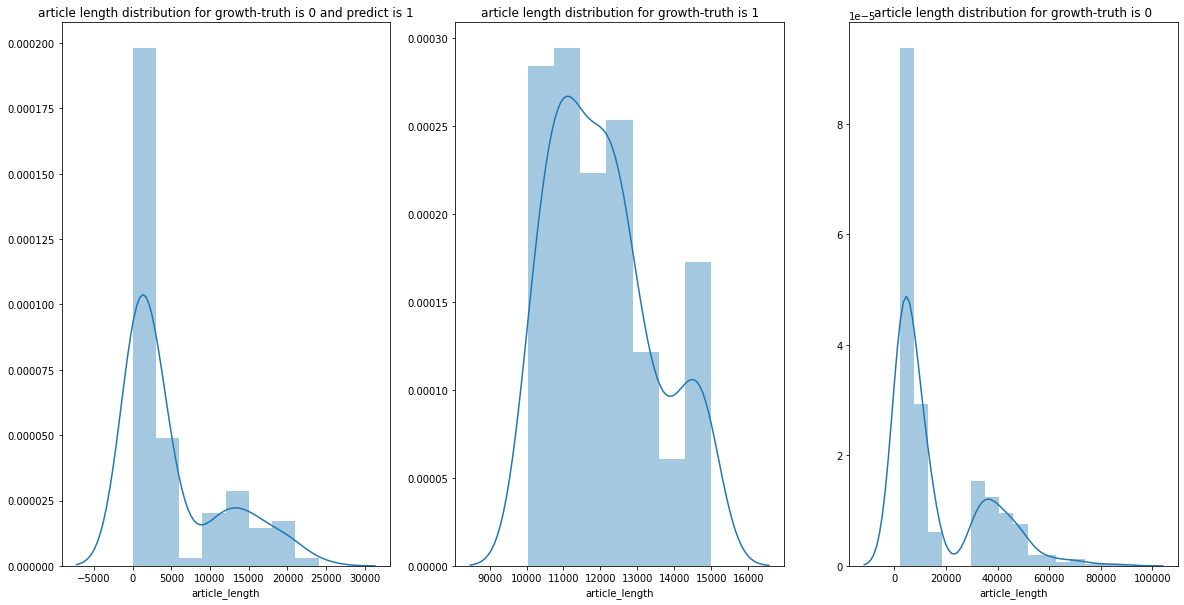

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
plt.subplot(1, 3, 1)
sns.distplot(test_df[(test_df['predict'] == 1)&(test_df['article_length'] < 25000)]['article_length'])
plt.title("article length distribution for growth-truth is 0 and predict is 1")

plt.subplot(1, 3, 2)
sns.distplot(test_df[(test_df['label_id'] == 1)]['article_length'])
plt.title("article length distribution for growth-truth is 1")


Text(0.5, 1.0, 'article length distribution for growth-truth is 0')

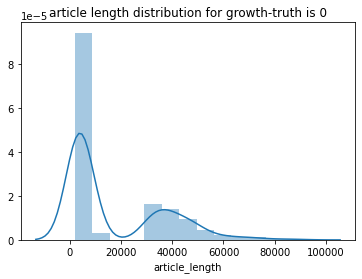

In [68]:
sns.distplot(test_df[(test_df['label_id'].isin([0,2]))]['article_length'])
plt.title("article length distribution for growth-truth is 0")

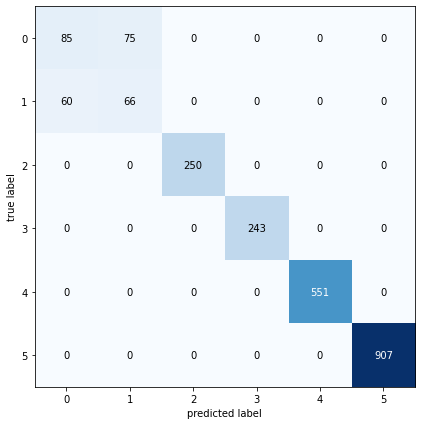

In [35]:
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize = (15,7))
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       160
           1       0.47      0.52      0.49       126
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       243
           4       1.00      1.00      1.00       551
           5       1.00      1.00      1.00       907

   micro avg       0.94      0.94      0.94      2237
   macro avg       0.84      0.84      0.84      2237
weighted avg       0.94      0.94      0.94      2237



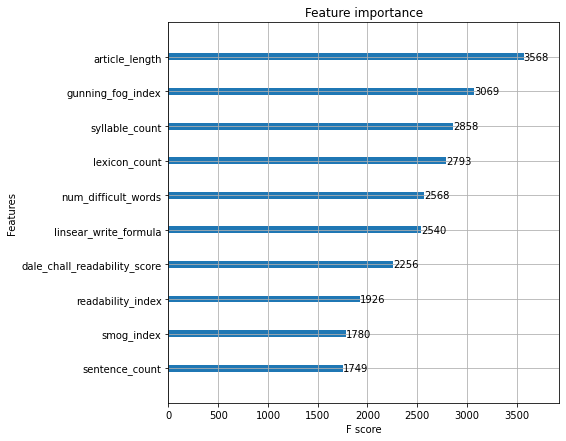

In [27]:
xgb_model.get_booster().feature_names = num_features
fig, ax = plt.subplots(1,1,figsize=(7,7))
xgb.plot_importance(xgb_model.get_booster(), ax=ax)